# 1.) Pull in Data and Convert ot Monthly

In [16]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
apple_data = yf.download('AAPL')
df = apple_data.resample("M").last()[["Adj Close"]]
df.head()

[*********************100%***********************]  1 of 1 completed


,Adj Close
Date,
1980-12-31,0.117887
1981-01-31,0.097591
1981-02-28,0.091546
1981-03-31,0.084637
1981-04-30,0.098023


# 2.) Create columns. 
  - Current Stock Price, Difference in stock price, Whether it went up or down over the next month,  option premium

In [18]:
# difference in stock price
df["Diff"] = df["Adj Close"].diff().shift(-1) # !!!看一下这一行

# target
df['Target'] = np.sign(df["Diff"])

df["Premium"] = .08 * df["Adj Close"]

# 3.) Pull in X data, normalize and build a LogReg on column 2

In [19]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [20]:
X = pd.read_csv("Xdata.csv", index_col="Date", parse_dates=["Date"])

In [21]:
y = df.loc[:"2023-09-30","Target"].copy()

df = df.loc[:"2023-09-30"].copy()

In [22]:
# fit a logistic regression model
logreg = LogisticRegression()

logreg.fit(X, y)

c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

LogisticRegression()

# 4.) Add columns, prediction and profits.

In [23]:
y_pred = logreg.predict(X)

c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [24]:
df["Predictions"] = y_pred 

In [25]:
df["Profit"] = 0.

In [29]:
df.loc[(df["Predictions"] == 1) & (df["Target"] == 1), "Profit"] = df["Premium"]

df.loc[(df["Predictions"] == 1) & (df["Target"] == -1), "Profit"] = (100 * df['Diff']) + df["Premium"]

# 5.) Plot profits over time

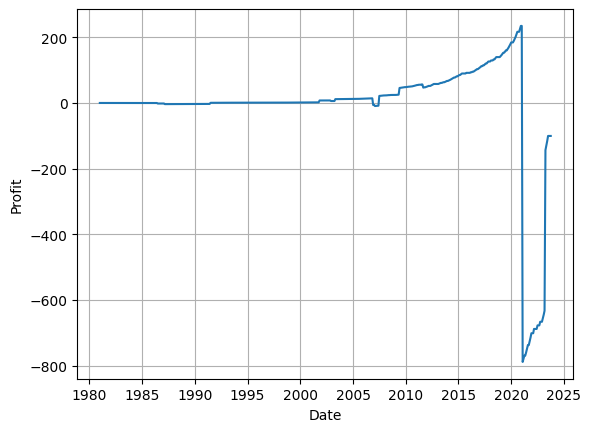

In [30]:
plt.plot(np.cumsum(df["Profit"]))
plt.grid()
plt.xlabel("Date")
plt.ylabel("Profit")
plt.show()

## 5.5) Short write up about how you see your skills valuable to PJ or Pjilip Liu

- **Data Science Skill:** Build models to make predictions. Provide investment advice from a technical analysis perspective
- **Business Sense:** Technical analysis is unable to capture the information embedded in economic cycles, demand fluctuations, unexpected events, social opinion, and so on. Fundamental analysis based on business sense can provide additional insights.

# 6.) Create a loop that stores total profits over time

# 7.) What is the optimal threshold and plot the total profits for this model.